In [11]:
# Rule
# IF pendapatan bulanan rendah, hutang tinggi dan riwayat kredit buruk THEN kelayakan kredit tidak layak
# IF pendapatan bulanan rendah, hutang tinggi dan riwayat kredit baik THEN kelayakan kredit tidak layak
# IF pendapatan bulanan rendah, hutang rendah dan riwayat kredit buruk THEN kelayakan kredit tidak layak
# IF pendapatan bulanan rendah, hutang rendah dan riwayat kredit baik THEN kelayakan kredit layak
# IF pendapatan bulanan tinggi, hutang tinggi dan riwayat kredit buruk THEN kelayakan kredit tidak layak
# IF pendapatan bulanan tinggi, hutang tinggi dan riwayat kredit baik THEN kelayakan kredit layak
# IF pendapatan bulanan tinggi, hutang rendah dan riwayat kredit buruk THEN kelayakan kredit tidak layak
# IF pendapatan bulanan tinggi, hutang rendah dan riwayat kredit baik THEN kelayakan kredit layak

In [12]:
class BaseFuzzy():
    def __init__(self):
        self.max_value = 0
        self.min_value = 0
        
    def turun(self, x):
        return (self.max_value - x)/(self.max_value - self.min_value)
        
    def naik(self, x):
        return (x - self.min_value)/(self.max_value - self.min_value)
        
    def rev_down(self, f):
        return self.max_value - f * (self.max_value - self.min_value)
        
    def rev_up(self, f):
        return f * (self.max_value - self.min_value) + self.min_value

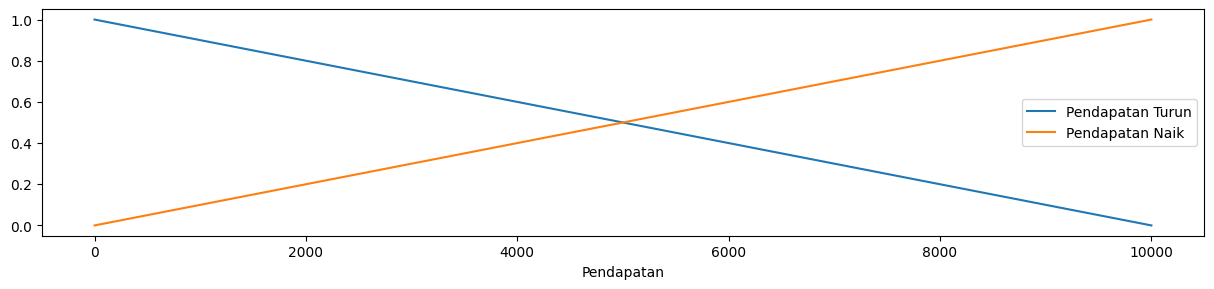

In [13]:
# Redefine the ranges and functions and plot again
pendapatan = BaseFuzzy()
pendapatan.min_value = 0
pendapatan.max_value = 10000

hutang = BaseFuzzy()
hutang.min_value = 0
hutang.max_value = 5000

riwayat = BaseFuzzy()
riwayat.min_value = 0
riwayat.max_value = 10

# Calculate fuzzy values
pendapatan_turun = [pendapatan.turun(x) for x in pendapatan_range]
pendapatan_naik = [pendapatan.naik(x) for x in pendapatan_range]

hutang_turun = [hutang.turun(x) for x in hutang_range]
hutang_naik = [hutang.naik(x) for x in hutang_range]

riwayat_turun = [riwayat.turun(x) for x in riwayat_range]
riwayat_naik = [riwayat.naik(x) for x in riwayat_range]

# Plot the membership functions
plt.figure(figsize=(15, 10))

# Pendapatan
plt.subplot(3, 1, 1)
plt.plot(pendapatan_range, pendapatan_turun, label='Pendapatan Turun')
plt.plot(pendapatan_range, pendapatan_naik, label='Pendapatan Naik')
plt.xlabel('Pendapatan')
plt.legend()

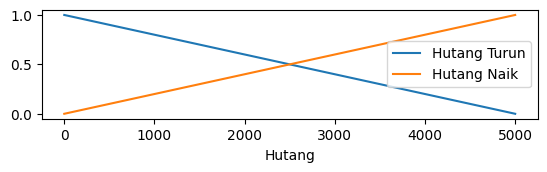

In [14]:
# Hutang
plt.subplot(3, 1, 2)
plt.plot(hutang_range, hutang_turun, label='Hutang Turun')
plt.plot(hutang_range, hutang_naik, label='Hutang Naik')
plt.xlabel('Hutang')
plt.legend()

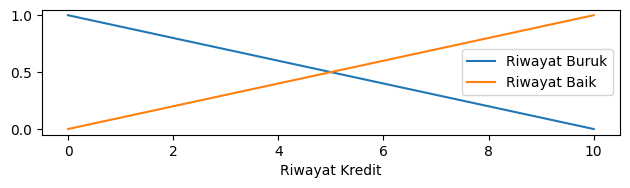

In [15]:
# Riwayat Kredit
plt.subplot(3, 1, 3)
plt.plot(riwayat_range, riwayat_turun, label='Riwayat Buruk')
plt.plot(riwayat_range, riwayat_naik, label='Riwayat Baik')
plt.xlabel('Riwayat Kredit')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
class SistemKelayakanKredit:
    def __init__(self):
        self.pendapatan = BaseFuzzy()
        self.hutang = BaseFuzzy()
        self.riwayat = BaseFuzzy()

        self.pendapatan.min_value = 0
        self.pendapatan.max_value = 10000
        
        self.hutang.min_value = 0
        self.hutang.max_value = 5000
        
        self.riwayat.min_value = 0
        self.riwayat.max_value = 10
    
    def fuzzy_rules(self, pendapatan, hutang, riwayat):
        pendapatan_rendah = self.pendapatan.turun(pendapatan)
        pendapatan_tinggi = self.pendapatan.naik(pendapatan)
        
        hutang_rendah = self.hutang.turun(hutang)
        hutang_tinggi = self.hutang.naik(hutang)
        
        riwayat_buruk = self.riwayat.turun(riwayat)
        riwayat_baik = self.riwayat.naik(riwayat)

        # Aturan fuzzy
        tidak_layak = max(
            min(pendapatan_rendah, hutang_tinggi, riwayat_buruk),  
            min(pendapatan_rendah, hutang_tinggi, riwayat_baik), 
            min(pendapatan_rendah, hutang_rendah, riwayat_buruk),   
            min(pendapatan_tinggi, hutang_tinggi, riwayat_buruk), 
            min(pendapatan_tinggi, hutang_rendah, riwayat_buruk)
        )
        
        layak = max(
            min(pendapatan_rendah, hutang_rendah, riwayat_baik),  
            min(pendapatan_tinggi, hutang_tinggi, riwayat_baik), 
            min(pendapatan_tinggi, hutang_rendah, riwayat_baik)
        )
        
        return {"layak": layak, "tidak_layak": tidak_layak}
    
    def cekFuzzy(self, layak):
        if layak["layak"] > layak["tidak_layak"]:
            return "Layak"
        else:
            return "Tidak Layak"
    
    def hasil(self, pendapatan, hutang, riwayat):
        fuzzy_results = self.fuzzy_rules(pendapatan, hutang, riwayat)
        return self.cekFuzzy(fuzzy_results)

In [17]:
# Contoh Penggunaan
system = SistemKelayakanKredit()

# Pengujian Kelayakan Dalam Beberapa Kasus
pengujian = [
    {"pendapatan": 3000000, "hutang": 400000, "riwayat_score": 3},  # Pendapatan rendah, hutang tinggi, riwayat buruk
    {"pendapatan": 3000000, "hutang": 1000000, "riwayat_score": 8},  # Pendapatan rendah, hutang rendah, riwayat baik
    {"pendapatan": 8000000, "hutang": 3000000, "riwayat_score": 9},  # Pendapatan tinggi, hutang tinggi, riwayat baik
    {"pendapatan": 9000000, "hutang": 1000000, "riwayat_score": 2},  # Pendapatan tinggi, hutang rendah, riwayat buruk
]

for user in pengujian:
    result = system.hasil(user["pendapatan"], user["hutang"], user["riwayat_score"])
    print(f"Pendapatan: {user['pendapatan']}, Hutang: {user['hutang']}, Riwayat Kredit: {user['riwayat_score']} -> Kelayakan Kredit: {result}")

Pendapatan: 3000000, Hutang: 400000, Riwayat Kredit: 3 -> Kelayakan Kredit: Tidak Layak
Pendapatan: 3000000, Hutang: 1000000, Riwayat Kredit: 8 -> Kelayakan Kredit: Layak
Pendapatan: 8000000, Hutang: 3000000, Riwayat Kredit: 9 -> Kelayakan Kredit: Layak
Pendapatan: 9000000, Hutang: 1000000, Riwayat Kredit: 2 -> Kelayakan Kredit: Tidak Layak
